In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Edit this cell

wd = '/home/astro/phrkvg/simulations/Rosotti2016'
outputs_dir = f'{wd}/planetm20'
params_file = f'{outputs_dir}/param.par'

outputs = [100]
planet_masses = [20]
file_prefix = 'dustdens'
dust_sizes = {          # TODO Automate this  to be  read from variables.par
    0: 0.2,
    1: 0.02,
    2: 0.002,
             }      

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


In [3]:
# Set variables for plotting

params_dict = {}

param_lines = open(params_file).readlines()
for line in param_lines:
    if line.split():
        param_label, param_value = line.split()[0:2]
        params_dict.update([(param_label, param_value)])
        
nphi = int(params_dict['NX'])
nrad = int(params_dict['NY'])
print(nrad,nphi)

radii = np.loadtxt(f'{outputs_dir}/domain_y.dat')[3:-3]    # ignore ghost cells
phis = np.linspace(0,2*np.pi,nphi+1)

R, Phi = np.meshgrid(radii,phis)
X = R*np.cos(Phi)
Y = R*np.sin(Phi)

print(radii.shape, phis.shape)

plotdust = False
if 'dust' in file_prefix:
    plotdust = True
    
plotsize = int(len(outputs)**0.5) + 1

plotsizex = len(outputs)
plotsizey = len(dust_sizes.keys())+1


450 1024
(451,) (1025,)


In [4]:
# ============== Run everything before this point ===================

(460800,)
(460800,)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(460800,)


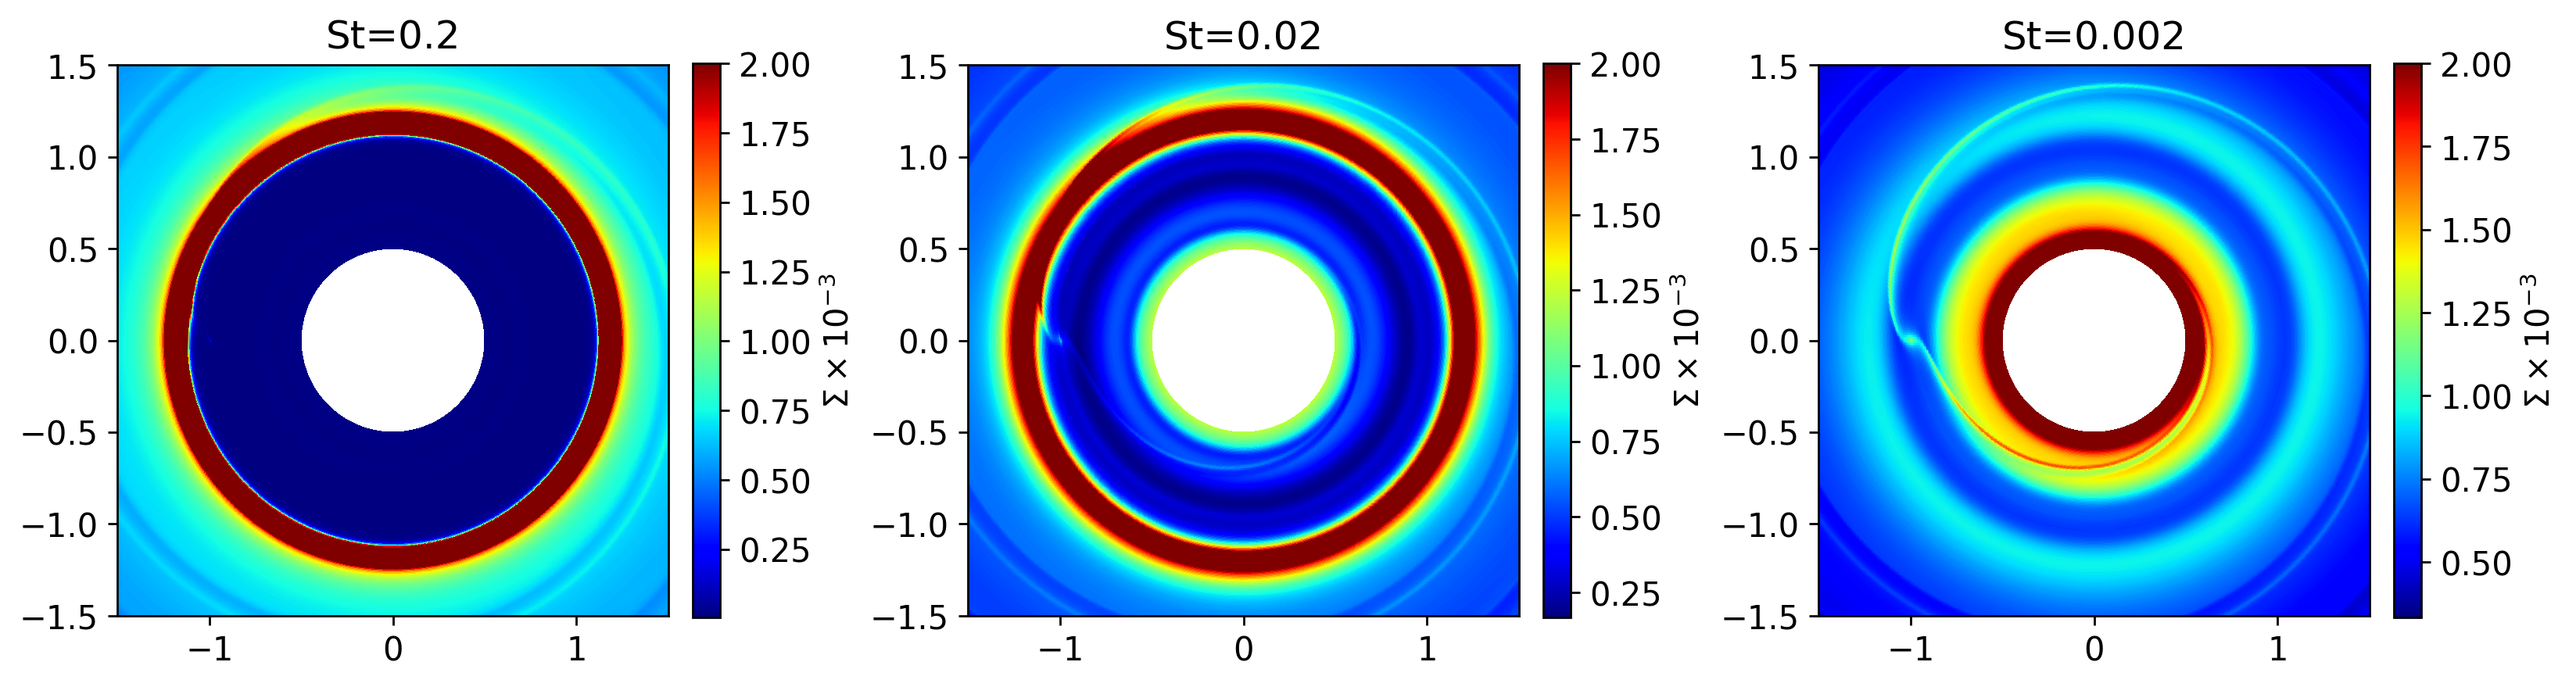

In [5]:
fig = plt.figure(figsize=(17,13), dpi=250)

# TODO  Automate setting same vmax, vmin for all density maps

for i,output in enumerate(outputs):
    for d,dust_size in enumerate(dust_sizes.keys()):
        if plotdust:
            ax = fig.add_subplot(plotsizex, plotsizey, str(3*(i+1)-2 + d))
            dustsize = str(dust_size) + '_'
        else:
            dustsize = ''
            ax = fig.add_subplot(plotsize, plotsize, i+1)
        
        surfdens = np.fromfile(f'{outputs_dir}/{file_prefix}{dustsize}{str(output)}.dat').reshape(nrad,nphi)
        dens_first_wedge = surfdens[:,0].reshape(nrad,1)
        dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
        cf = ax.pcolormesh(X,Y,dens_additional.T*100000, cmap='jet', vmax=2.0)
  
        fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04, label='$\\Sigma \\times 10^{-3}$')

        ax.set_xlim(-1.5,1.5)
        ax.set_ylim(-1.5,1.5)
        ax.set_aspect('equal')

        if plotdust:
            ax.set_title(f'St={dust_sizes[d]}')
        else: 
            ax.set_title('Gas')
            break
  
plt.tight_layout()


Text(0.5, 1.0, 'Gas')

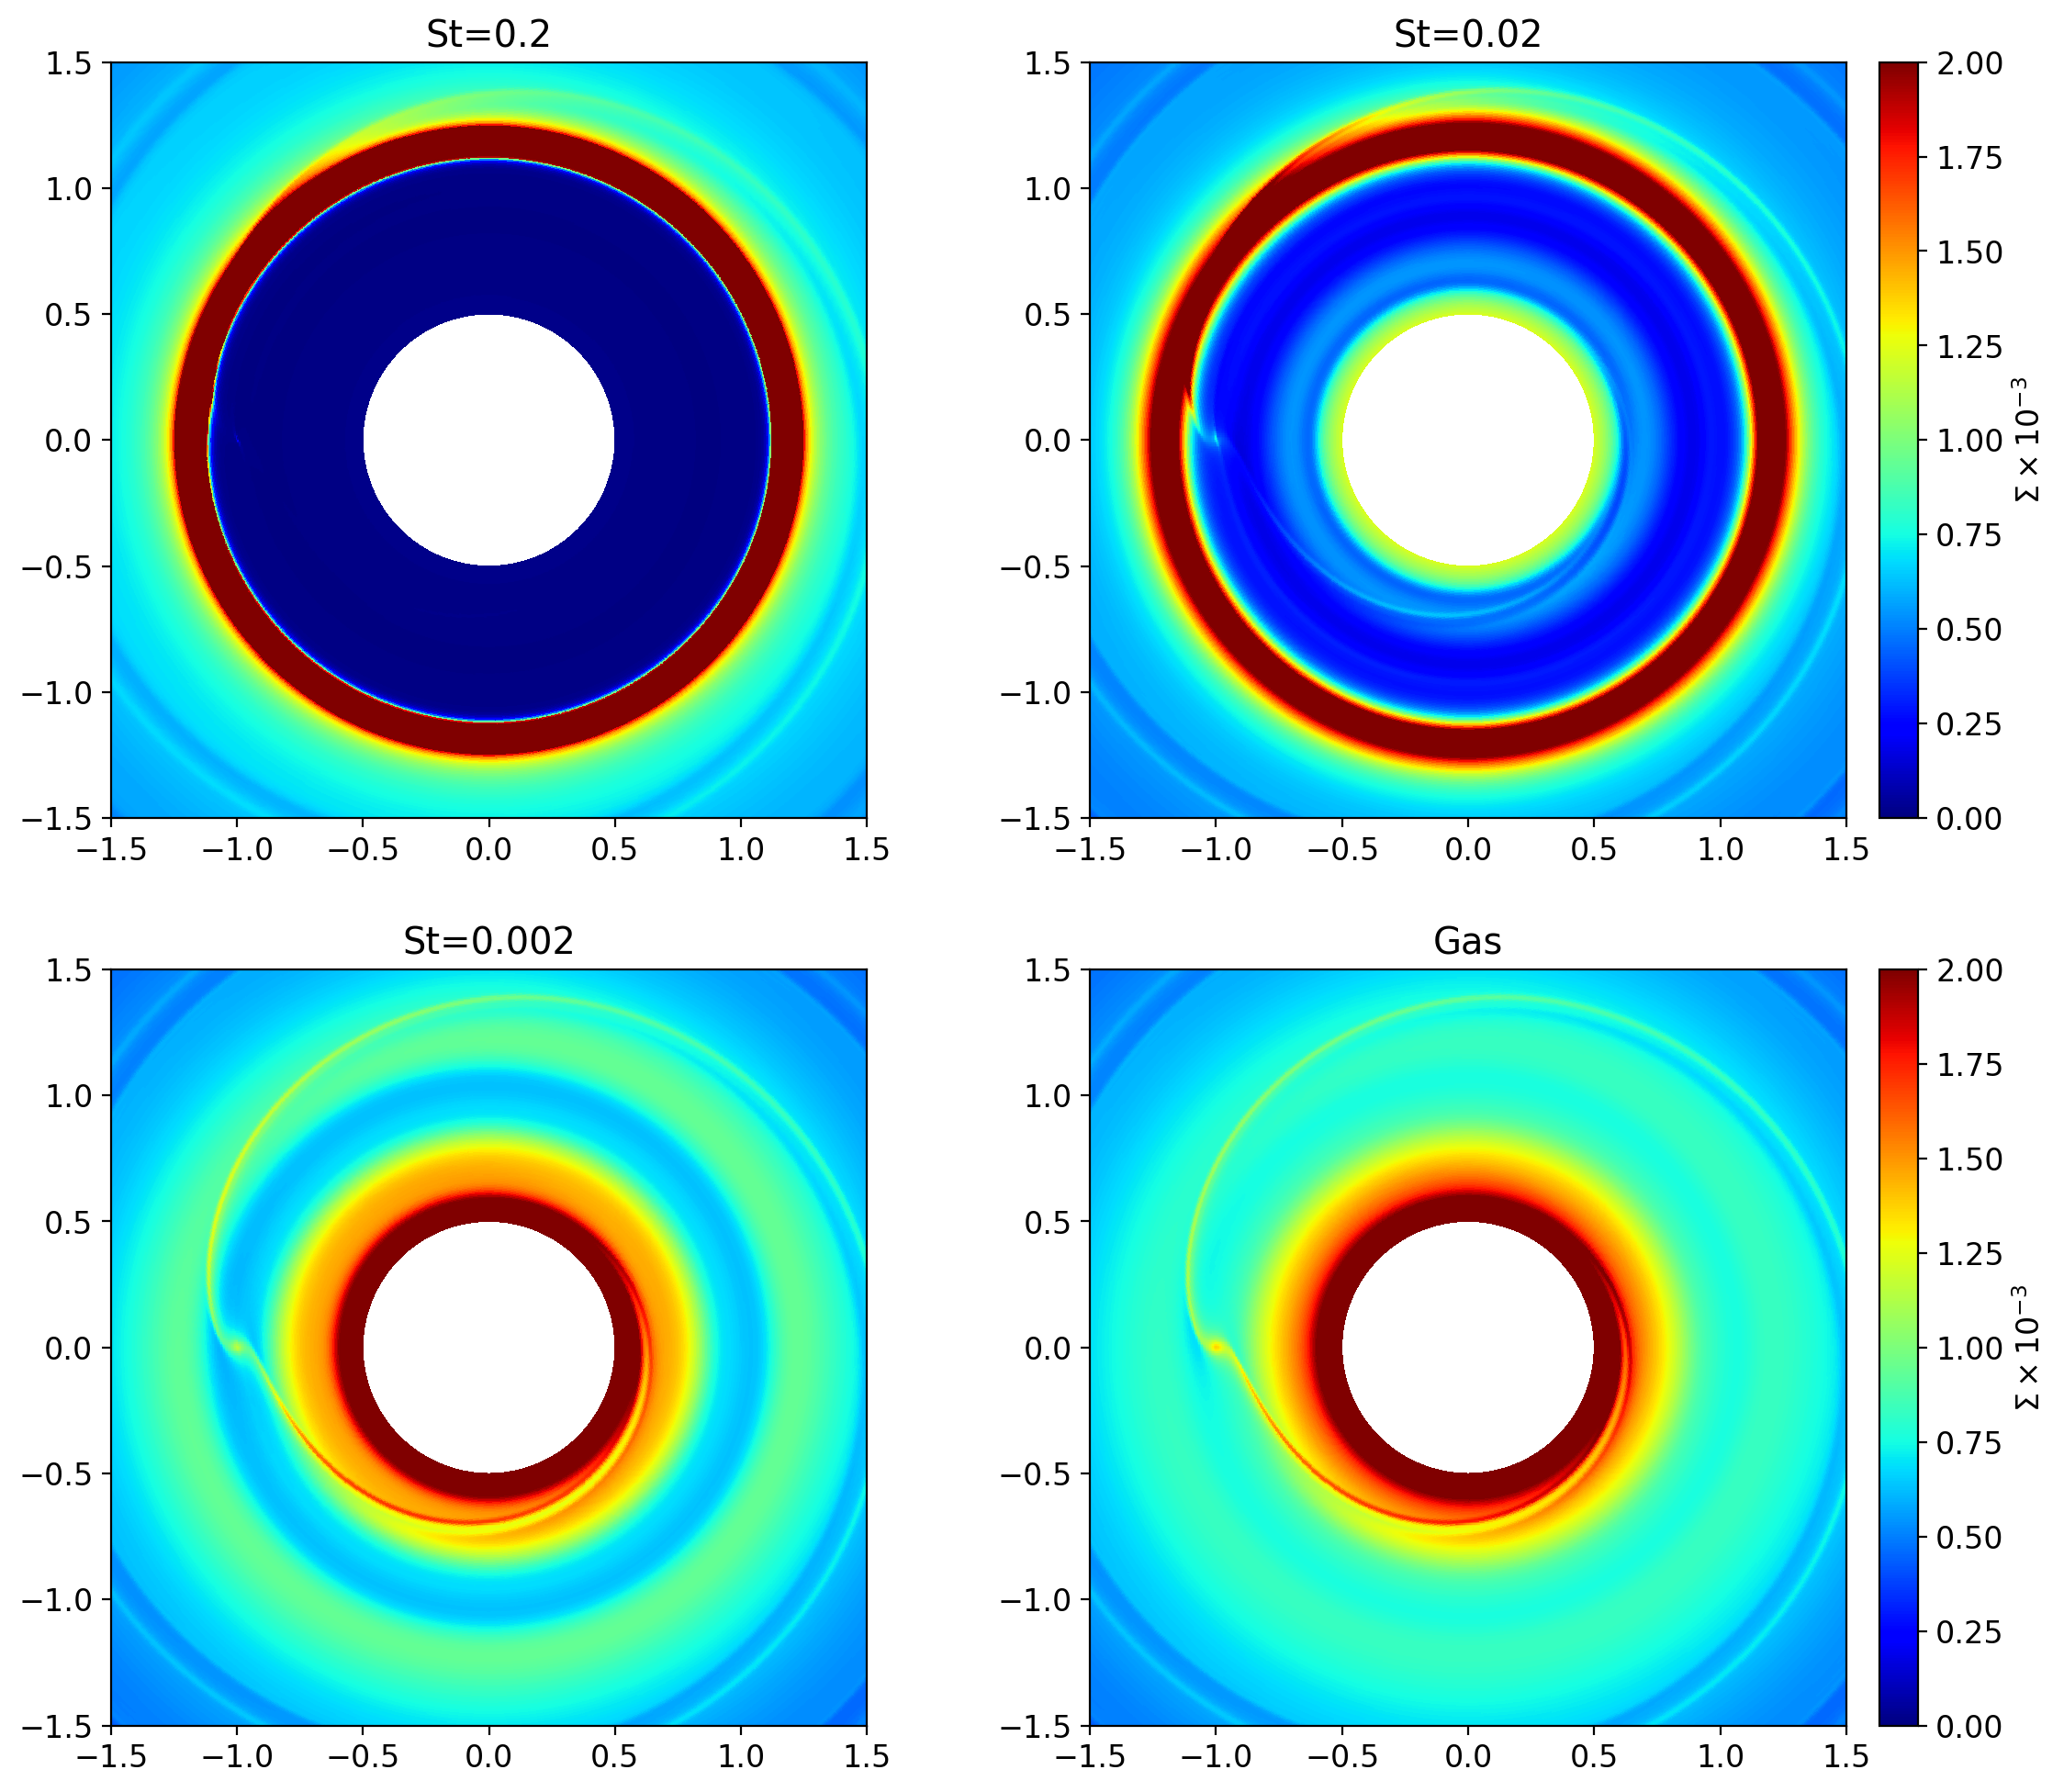

In [48]:
fig = plt.figure(figsize=(13,12), dpi=200)
plotsize=2
# TODO  Automate setting same vmax, vmin for all density maps

output=100
for d,dust_size in enumerate(dust_sizes.keys()):
    dustsize = str(dust_size) + '_'
    ax = fig.add_subplot(plotsize, plotsize, d+1)
    surfdens = np.fromfile(f'{outputs_dir}/dustdens{dustsize}{str(output)}.dat').reshape(nrad,nphi)
    dens_first_wedge = surfdens[:,0].reshape(nrad,1)
    dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
    cf = ax.pcolormesh(X,Y,dens_additional.T*100000, cmap='jet', vmin=0, vmax=2.0)
    
    if (d+1)%2 == 0:
        fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04, label='$\\Sigma \\times 10^{-3}$')

    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_aspect('equal')

    ax.set_title(f'St={dust_sizes[d]}')

ax = fig.add_subplot(plotsize, plotsize, d+2)
surfdens = np.fromfile(f'{outputs_dir}/gasdens{str(output)}.dat').reshape(nrad,nphi)
dens_first_wedge = surfdens[:,0].reshape(nrad,1)
dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
cf = ax.pcolormesh(X,Y,dens_additional.T*1000, cmap='jet', vmin=0, vmax=2.0)

fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04, label='$\\Sigma \\times 10^{-3}$')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_aspect('equal')

ax.set_title('Gas')


# plt.tight_layout()


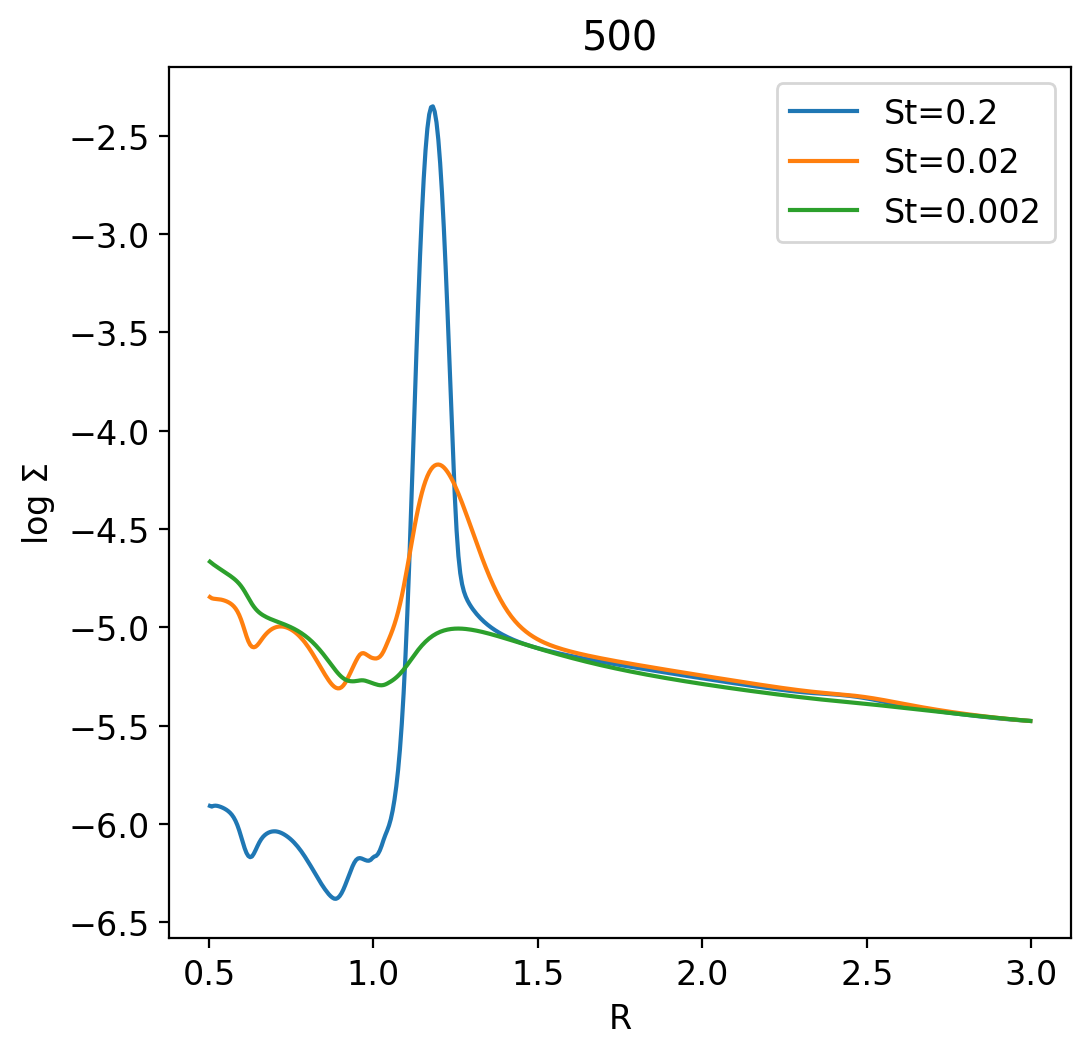

In [171]:
# Plot sigma for all dust species at a timestep

fig = plt.figure(figsize=(15,15), dpi=200)

r_cells = [(radii[n]+radii[n+1])/2 for n in range(len(radii)-1)]    # calculate radii in middles of cells 


for i,output in enumerate(outputs):
    ax = fig.add_subplot(plotsize, plotsize, i+1)
    for dust_size in dust_sizes:
        if plotdust:
            dustsize = str(dust_size) + '_'
        else:
            dustsize = ''
        
        surfdens = np.fromfile(f'{outputs_dir}/{file_prefix}{dustsize}{str(output)}.dat').reshape(nrad,nphi)
        dens_first_wedge = surfdens[:,0].reshape(nrad,1)
        dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
        sigmad_tot = np.sum(dens_additional, axis=1)
        sigmad_azi = sigmad_tot/nphi
        
        if plotdust:
            ax.plot(r_cells, np.log10(sigmad_azi), label=f'St={dust_sizes[dust_size]}')
            ax.legend()
        else:
            ax.plot(r_cells, np.log10(sigmad_azi))

        ax.set_xlabel('R')
        ax.set_ylabel('log $\Sigma$')
        ax.set_title(str(output))
        
        if not plotdust:
            break


plt.tight_layout()




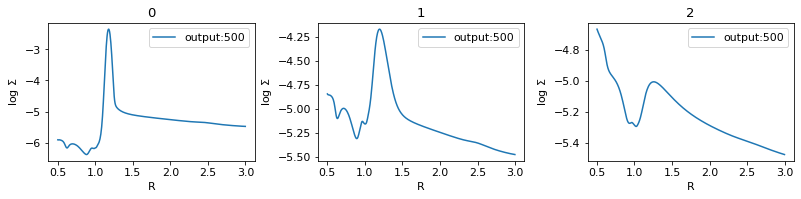

In [136]:
# Plot sigma at different timesteps for same dust species

fig = plt.figure(figsize=(15,10))

r_cells = [(radii[n]+radii[n+1])/2 for n in range(len(radii)-1)]    # calculate radii in middles of cells 

for i, dust_size in enumerate(dust_sizes.keys()):
    subplot_num = str(plotsizey) + str(plotsizey) + str(i+1)
    ax = fig.add_subplot(int(subplot_num))
    if plotdust:
        dustsize = str(dust_size) + '_'
    else:
        dustsize = ''
    for output in outputs:
        surfdens = np.fromfile(f'{outputs_dir}/{file_prefix}{dustsize}{str(output)}.dat').reshape(nrad,nphi)
        dens_first_wedge = surfdens[:,0].reshape(nrad,1)
        dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
        sigmad_tot = np.sum(dens_additional, axis=1)
        sigmad_azi = sigmad_tot/nphi
        
        ax.plot(r_cells, np.log10(sigmad_azi), label=f'output:{output}')

    ax.set_xlabel('R')
    ax.set_ylabel('log $\Sigma$')
    ax.legend()

    if plotdust:
        ax.set_title(str(dust_size))
    else:
        break

plt.tight_layout()

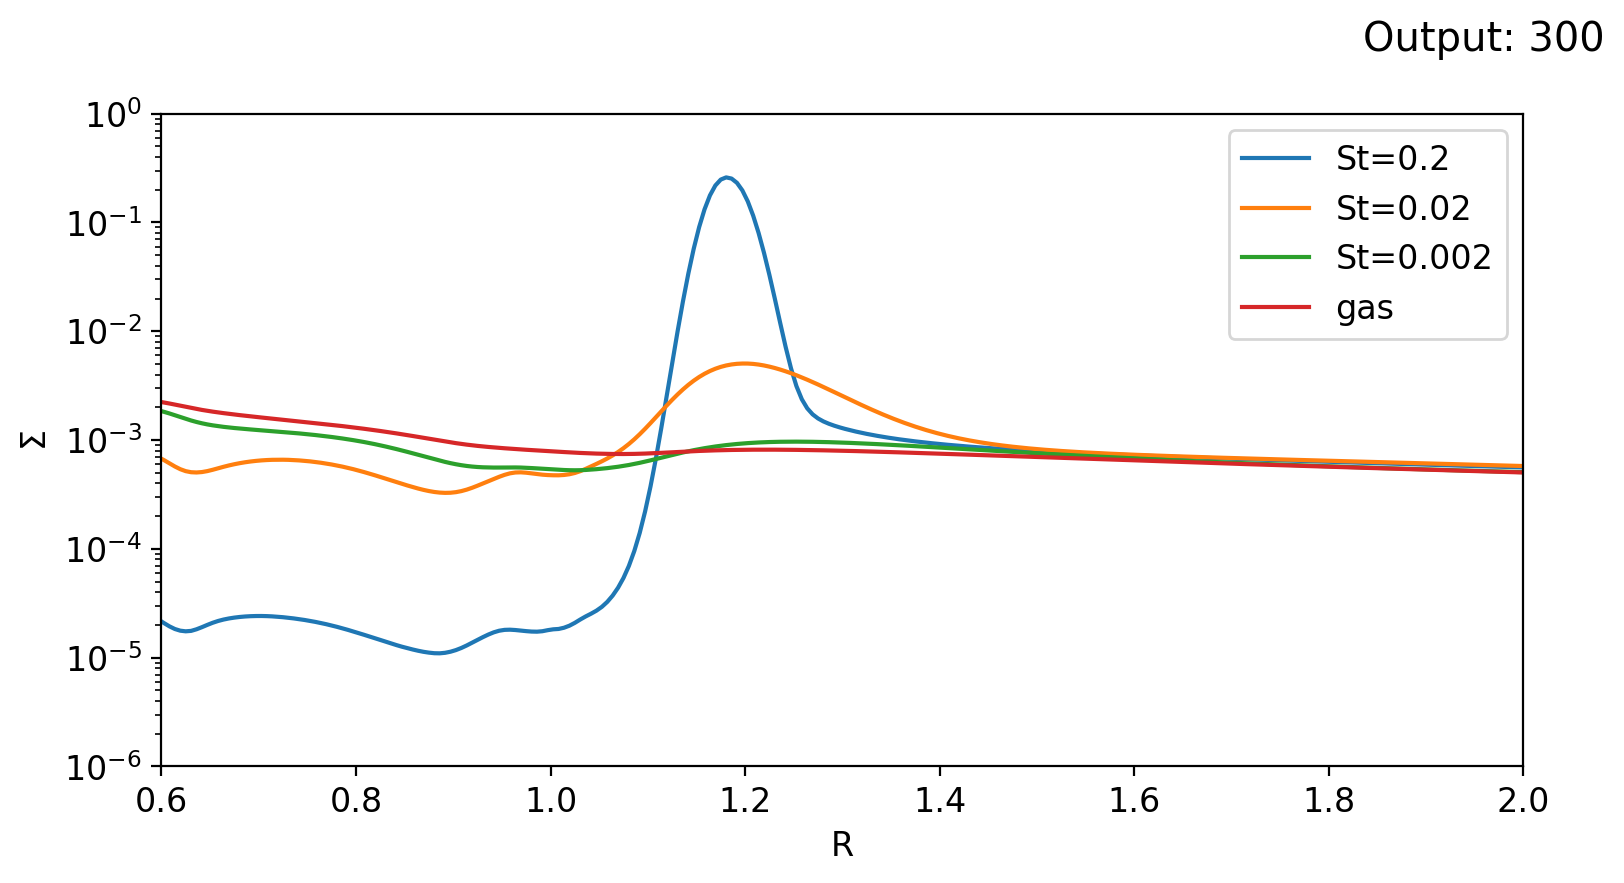

In [7]:
# Plot gas sigma at same timestep for different planet masses

fig = plt.figure(figsize=(15,8), dpi=200)
plotsize= int(len(planet_masses)**0.5) + 1
output = 300

r_cells = [(radii[n]+radii[n+1])/2 for n in range(len(radii)-1)]    # calculate radii in middles of cells 

for i, planetm in enumerate(planet_masses):
    for dust_size in dust_sizes.keys():
        if plotdust:
            dustsize = str(dust_size) + '_'
        else:
            dustsize = ''

        ax = fig.add_subplot(plotsize, plotsize, i+1)
        outputs_dir = f'{wd}/planetm{str(planetm)}'
        surfdens = np.fromfile(f'{outputs_dir}/{file_prefix}{dustsize}{str(output)}.dat').reshape(nrad,nphi)
        dens_first_wedge = surfdens[:,0].reshape(nrad,1)
        dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
        sigmad_tot = np.sum(dens_additional, axis=1)
        sigmad_azi = sigmad_tot/nphi
        
        if plotdust:
            ax.plot(r_cells, (sigmad_azi*100), label=f'St={str(dust_sizes[dust_size])}')
        else:
            ax.plot(r_cells, np.log10(sigmad_azi))

        ax.set_xlabel('R')
        ax.set_ylabel('$\Sigma$')
        ax.set_yscale('log')
        ax.set_ylim(1e-6,1)
        ax.set_xlim(0.6,2)
#         ax.set_title(planetm)
        ax.legend()
    
    surfdens = np.fromfile(f'{outputs_dir}/gasdens{str(output)}.dat').reshape(nrad,nphi)
    dens_first_wedge = surfdens[:,0].reshape(nrad,1)
    dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
    sigmad_tot = np.sum(dens_additional, axis=1)
    sigmad_azi = sigmad_tot/nphi
    ax.plot(r_cells, (sigmad_azi), label='gas')
    plt.suptitle(f'Output: {output}')
    
#     surfdens = np.fromfile(f'{wd}/planetm20_highdustdens/dustdens2_0.dat').reshape(nrad,nphi)
#     dens_first_wedge = surfdens[:,0].reshape(nrad,1)
#     dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
#     sigmad_tot = np.sum(dens_additional, axis=1)
#     sigmad_azi = sigmad_tot/nphi
#     ax.plot(r_cells, np.log10(sigmad_azi), label='dust0')

    ax.legend()

plt.tight_layout()

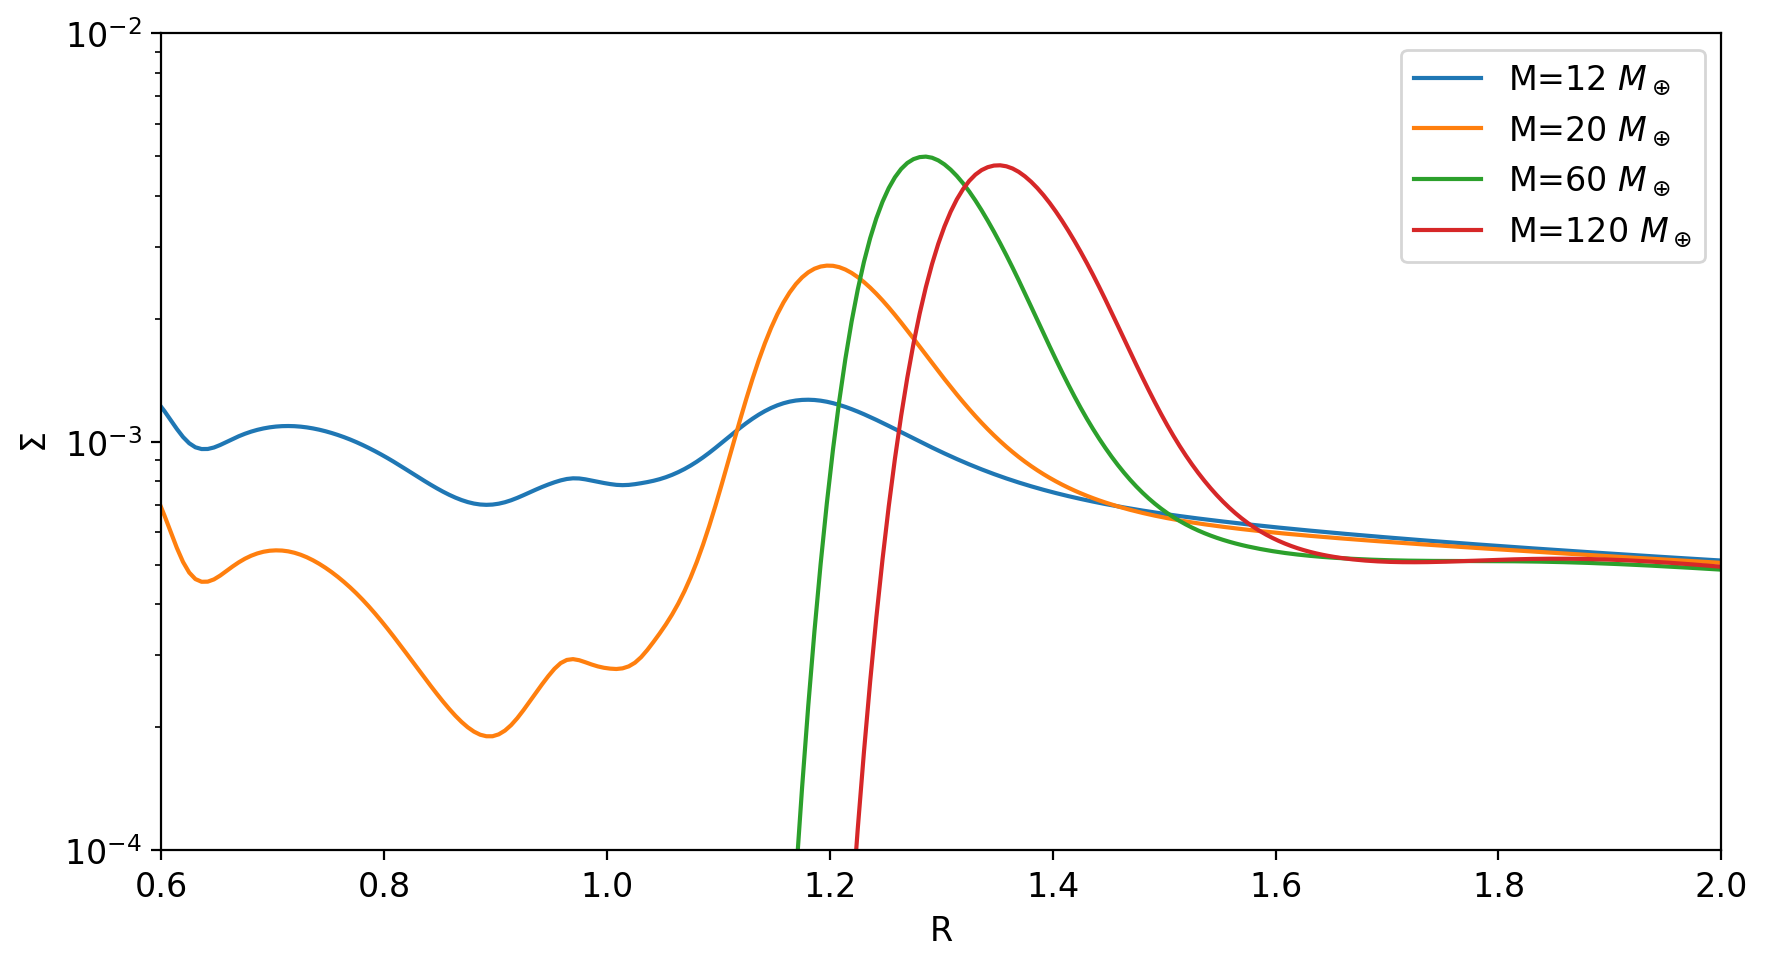

In [166]:
# Plot gas sigma at same timestep for different planet masses

fig, ax = plt.subplots(figsize=(9,5), dpi=200)
output = 100
dust_size = 1

r_cells = [(radii[n]+radii[n+1])/2 for n in range(len(radii)-1)]    # calculate radii in middles of cells 

for i, planetm in enumerate(planet_masses):
        dustsize = str(dust_size) + '_'
        outputs_dir = f'{wd}/planetm{str(planetm)}'
        surfdens = np.fromfile(f'{outputs_dir}/{file_prefix}{dustsize}{str(output)}.dat').reshape(nrad,nphi)
        dens_first_wedge = surfdens[:,0].reshape(nrad,1)
        dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
        sigmad_tot = np.sum(dens_additional, axis=1)
        sigmad_azi = sigmad_tot/nphi
        
        ax.plot(r_cells, (sigmad_azi*100), label=f'M={str(planetm)} $M_\oplus$')

        ax.set_xlabel('R')
        ax.set_ylabel('$\Sigma$')
        ax.set_yscale('log')
        ax.set_ylim(1e-4,1e-2)
        ax.set_xlim(0.6,2)
        ax.legend()
    
    
#     surfdens = np.fromfile(f'{wd}/planetm20_highdustdens/dustdens2_0.dat').reshape(nrad,nphi)
#     dens_first_wedge = surfdens[:,0].reshape(nrad,1)
#     dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
#     sigmad_tot = np.sum(dens_additional, axis=1)
#     sigmad_azi = sigmad_tot/nphi
#     ax.plot(r_cells, np.log10(sigmad_azi), label='dust0')


plt.tight_layout()

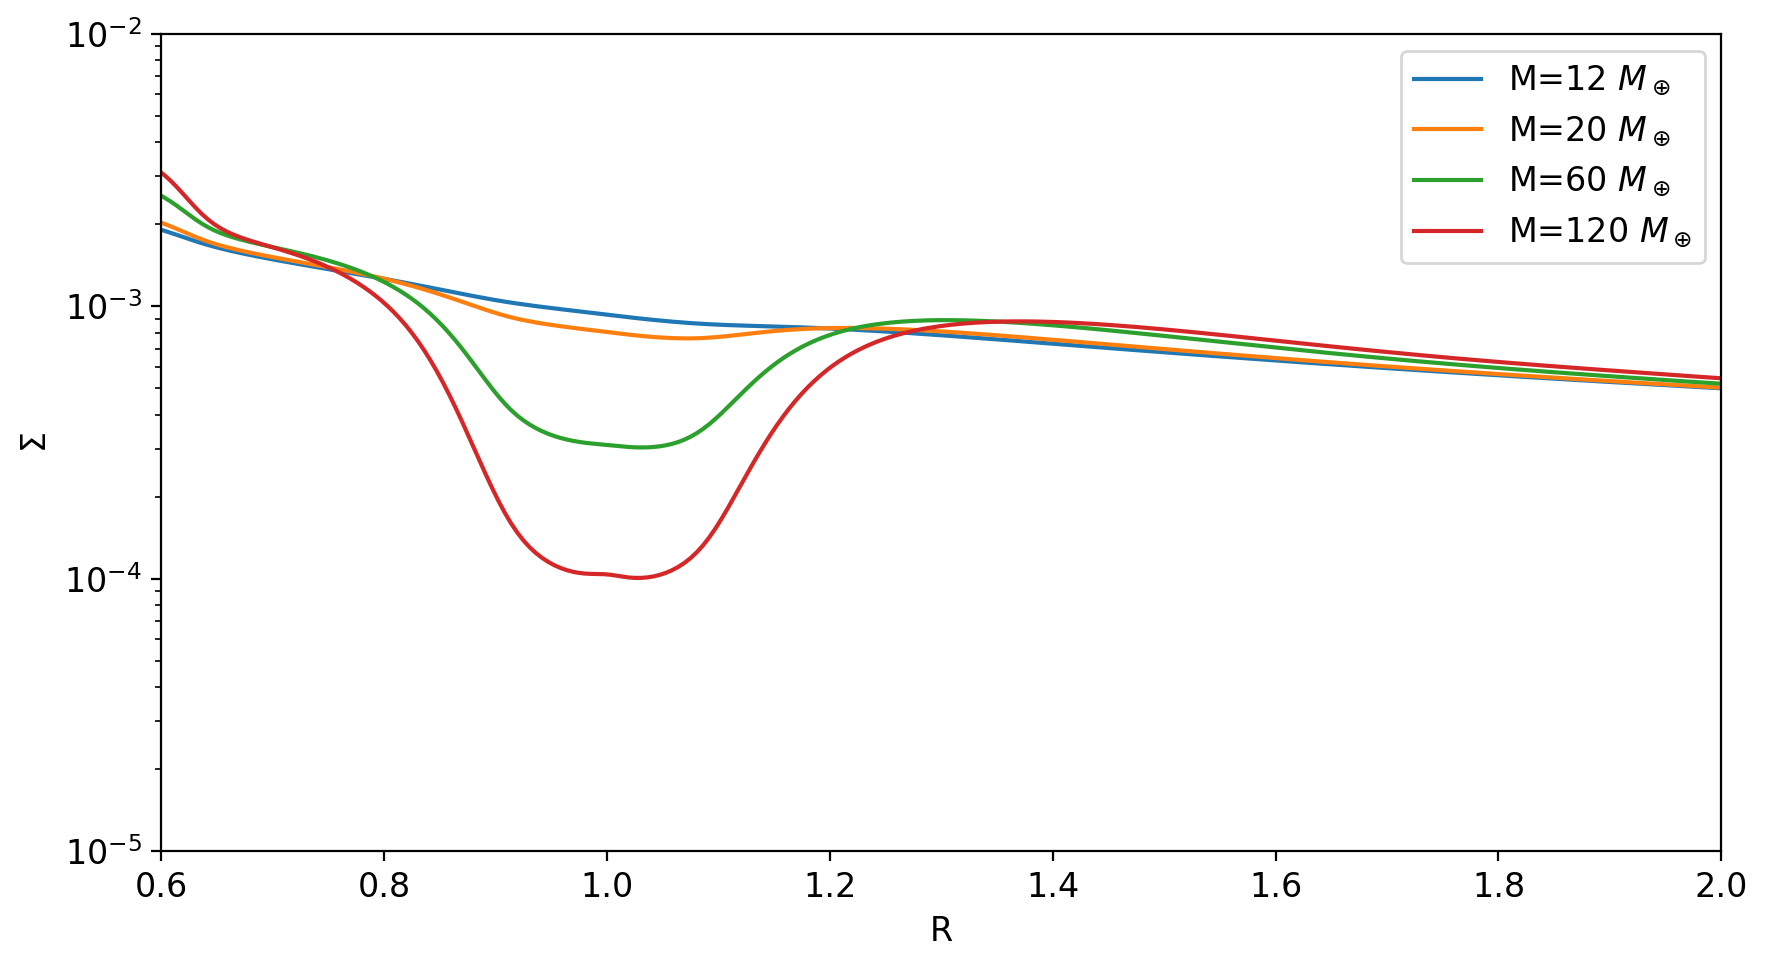

In [45]:
# Plot gas sigma at same timestep for different planet masses

fig, ax = plt.subplots(figsize=(9,5), dpi=200)
output = 100
planet_masses = [12, 20, 60, 120]


r_cells = [(radii[n]+radii[n+1])/2 for n in range(len(radii)-1)]    # calculate radii in middles of cells 

for i, planetm in enumerate(planet_masses):
        outputs_dir = f'{wd}/planetm{str(planetm)}'
        surfdens = np.fromfile(f'{outputs_dir}/gasdens{str(output)}.dat').reshape(nrad,nphi)
        dens_first_wedge = surfdens[:,0].reshape(nrad,1)
        dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
        sigmad_tot = np.sum(dens_additional, axis=1)
        sigmad_azi = sigmad_tot/nphi
        
        ax.plot(r_cells, (sigmad_azi), label=f'M={str(planetm)} $M_\oplus$')

        ax.set_xlabel('R')
        ax.set_ylabel('$\Sigma$')
        ax.set_yscale('log')
        ax.set_ylim(1e-5,1e-2)
        ax.set_xlim(0.6,2)
        ax.legend()
    
    
#     surfdens = np.fromfile(f'{wd}/planetm20_highdustdens/dustdens2_0.dat').reshape(nrad,nphi)
#     dens_first_wedge = surfdens[:,0].reshape(nrad,1)
#     dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
#     sigmad_tot = np.sum(dens_additional, axis=1)
#     sigmad_azi = sigmad_tot/nphi
#     ax.plot(r_cells, np.log10(sigmad_azi), label='dust0')


plt.tight_layout()

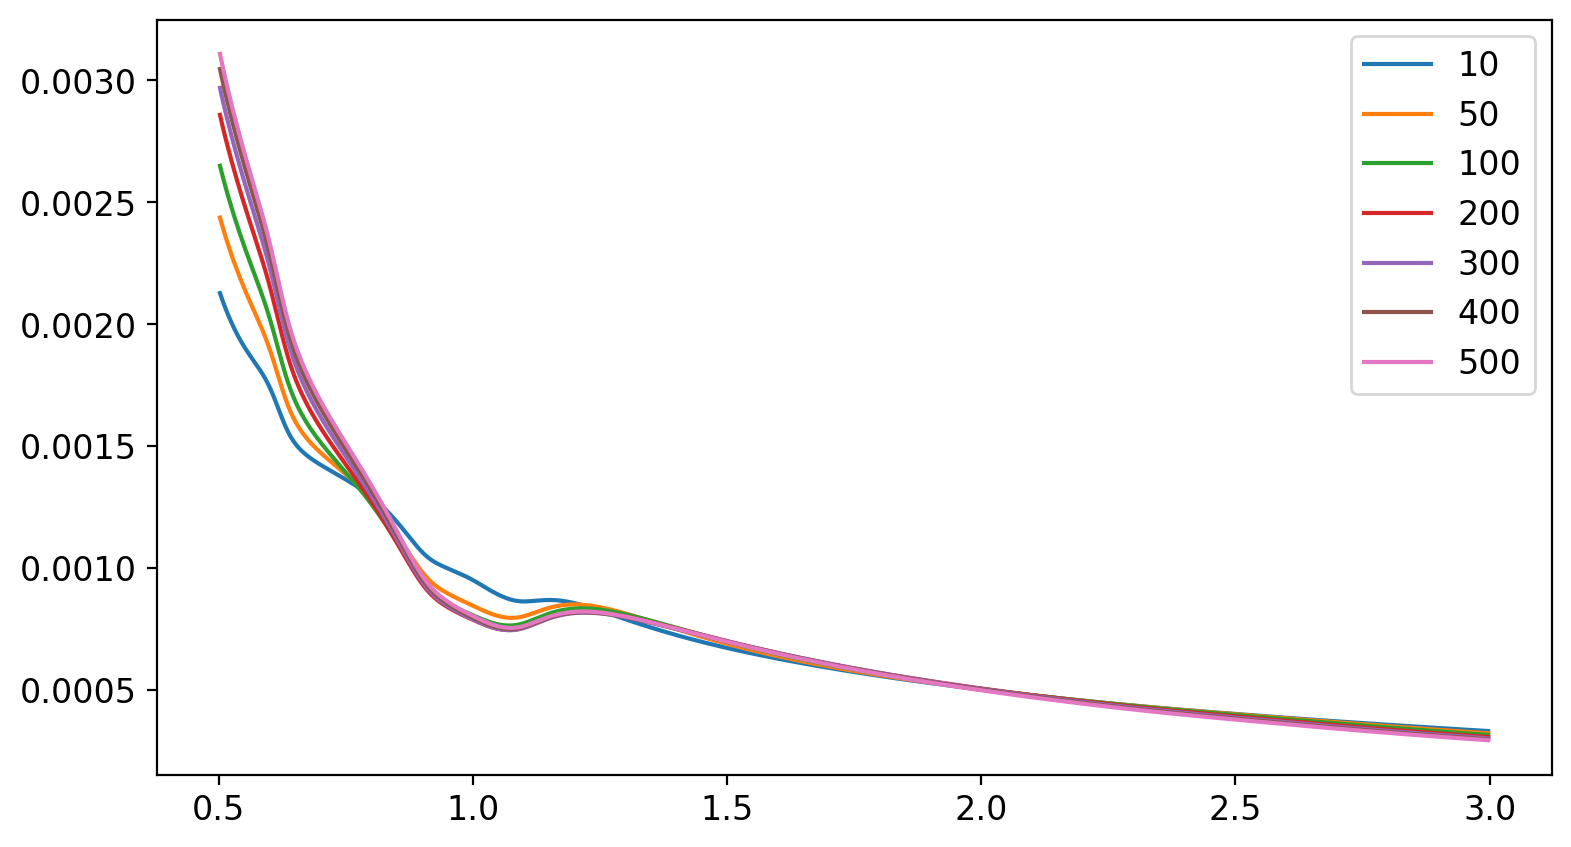

In [8]:
fig, ax = plt.subplots(figsize=(9,5), dpi=200)

r_cells = [(radii[n]+radii[n+1])/2 for n in range(len(radii)-1)]    # calculate radii in middles of cells 
outputs = [10,50,100,200,300,400,500]

for output in outputs:
    surfdens = np.fromfile(f'{outputs_dir}/gasdens{str(output)}.dat').reshape(nrad,nphi)
    dens_first_wedge = surfdens[:,0].reshape(nrad,1)
    dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
    sigmad_tot = np.sum(dens_additional, axis=1)
    sigmad_azi = sigmad_tot/nphi
    ax.plot(r_cells, (sigmad_azi), label=str(output))

    
ax.legend()


In [ ]:
r_cells = [(radii[n]+radii[n+1])/2 for n in range(len(radii)-1)]    # calculate radii in middles of cells 
delta_r = r_cells[1:]-r_cells[:-2]

fig, ax = plt.subplots(figsize=(9,5), dpi=200)

outputs = [10,50,100,200,300,400,500]

for output in outputs:
    surfdens = np.fromfile(f'{outputs_dir}/gasdens{str(output)}.dat').reshape(nrad,nphi)
    dens_first_wedge = surfdens[:,0].reshape(nrad,1)
    dens_additional = np.concatenate((surfdens[:,:],dens_first_wedge),axis=1)
    sigmad_tot = np.sum(dens_additional, axis=1)
    sigmad_azi = sigmad_tot/nphi
    M_cell = sigma_dust_tot[i]*(radii*1.5e13)*2*np.pi*(delta_r*1.5e13)

    ax.plot(r_cells, (sigmad_azi), label=str(output))

    
ax.legend()
